In [88]:
%matplotlib inline
import pylab as plt
import numpy as np
from astrometry.util.fits import *
from astrometry.util.plotutils import *
from collections import Counter
from astrometry.util.starutil import *
from scipy.ndimage.filters import *

In [89]:
psfsigma = 0.88
H,W = 25,25
sig1 = 1.
flux = 100.

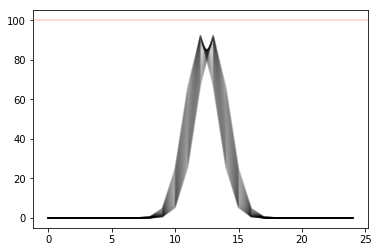

In [90]:
subpix = np.linspace(0, 1, 100)
peakflux = np.zeros(len(subpix))
flux0 = np.zeros(len(subpix))
flux1 = np.zeros(len(subpix))

plt.clf()
image = np.zeros((H,W), np.float32)
xx,yy = np.meshgrid(np.arange(W), np.arange(H))
for i,s in enumerate(subpix):
    cx = W//2 + s
    cy = H//2 + 0.5
    image = flux/(2.*np.pi*psfsigma**2) * np.exp(-((xx-cx)**2 + (yy-cy)**2) / (2.*psfsigma**2))
    psfnorm = 1./(2.*np.sqrt(np.pi)*psfsigma)
    detmap = gaussian_filter(image, psfsigma) / (psfnorm**2)
    plt.plot(detmap[H//2,:], 'k-', alpha=0.05)
    peakflux[i] = np.max(detmap)
    flux0[i] = detmap[H//2, W//2]
    flux1[i] = detmap[H//2, W//2+1]
plt.axhline(flux, color='r', alpha=0.2);

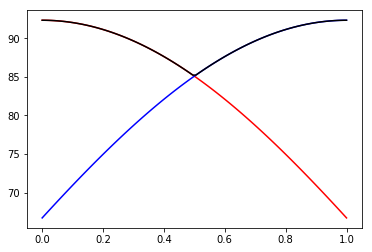

In [91]:
plt.plot(subpix, flux0, 'r-')
plt.plot(subpix, flux1, 'b-')
plt.plot(subpix, peakflux, 'k-');

In [76]:
psfsigma = 0.88   # ~ critically sampled
np.exp(-((np.sqrt(2)/2.)**2 / (2.*(np.sqrt(2)*psfsigma)**2)))

0.8509386120550868

In [92]:
psfsigma = 1.
np.exp(-((np.sqrt(2)/2.)**2 / (2.*(np.sqrt(2)*psfsigma)**2)))

0.8824969025845955

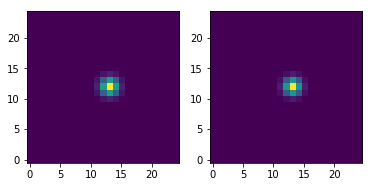

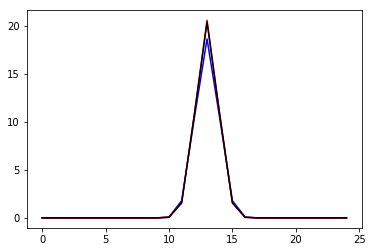

In [85]:
# Try subsampling the image
subpix = np.linspace(0, 1, 100)
peakflux = np.zeros(len(subpix))
flux0 = np.zeros(len(subpix))
flux1 = np.zeros(len(subpix))

plt.clf()
S = 4
xx,yy = np.meshgrid(np.arange(0, W, 1./S), np.arange(0, H, 1./S))
xx -= (S-1.)/(2.*S)
yy -= (S-1.)/(2.*S)
for i,s in enumerate(subpix):
    cx = W//2 + s
    cy = H//2 + 0
    image = flux/(2.*np.pi*psfsigma**2) * np.exp(-((xx-cx)**2 + (yy-cy)**2) / (2.*psfsigma**2))
    # bin
    binned = np.zeros((H,W), np.float32)
    for bi in range(S):
        for bj in range(S):
            binned += image[bj::S, bi::S]
    image = binned / (S**2)
    psfnorm = 1./(2.*np.sqrt(np.pi)*psfsigma)
    detmap = gaussian_filter(image, psfsigma) / (psfnorm**2)
    peakflux[i] = np.max(detmap)
    flux0[i] = detmap[H//2, W//2]
    flux1[i] = detmap[H//2, W//2+1]
    
axx,ayy = np.meshgrid(np.arange(0, W), np.arange(0, H))
aimage = flux/(2.*np.pi*psfsigma**2) * np.exp(-((axx-cx)**2 + (ayy-cy)**2) / (2.*psfsigma**2))

sigb = np.hypot(psfsigma, 1./12.)
bimage = flux/(2.*np.pi*sigb**2) * np.exp(-((axx-cx)**2 + (ayy-cy)**2) / (2.*sigb**2))


plt.subplot(1,2,1)
plt.imshow(image, interpolation='nearest', origin='lower')
plt.subplot(1,2,2)
plt.imshow(aimage, interpolation='nearest', origin='lower')
plt.show()

plt.plot(image[H//2,:], 'b-')
plt.plot(aimage[H//2,:], 'r-');
plt.plot(bimage[H//2,:], 'k-');

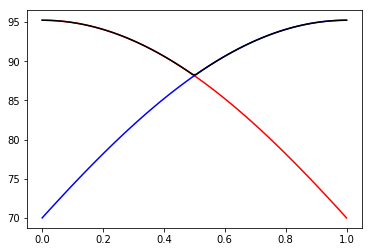

In [86]:
plt.plot(subpix, flux0, 'r-')
plt.plot(subpix, flux1, 'b-')
plt.plot(subpix, peakflux, 'k-')

In [87]:
np.min(peakflux)

88.29389190673828